In [1]:
!pip install -U fortran-magic
!pip install "setuptools <65"

In [2]:
%reload_ext fortranmagic

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 36 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    out_rows = len(A)
    out_cols = len(A[0])
    out = [[0 for col in range(out_cols)] for row in range(out_rows)]

    for i in range(out_rows):
        for j in range(out_cols):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
try:
  matmul(a,b)
except:
  print("error encontrado")

**My own example 3 - Chekcing the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    out_rows = len(A)
    out_cols = len(B[0])
    out = [[0 for col in range(out_cols)] for row in range(out_rows)]

    if len(A[0]) == len(B):

      for i in range(out_rows):
          for j in range(out_cols):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
    else:
      print("No es compatible")
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
try:
  matmul(a,b)
except:
  print("error encontrado")

No es compatible


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
A = [[15,20],
   [35,22]]

B = [[45,13],
     [100,21]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
matmul(A,B)

[[2675, 615], [3775, 917]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

0.6864505979214105

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.4052834964923173, 0.2843298327053123, 0.5366171804554313],
 [0.1764011234992119, 0.5888127832163148, 0.1629509450145724]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import random
import time

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

def matmul(A, B):
    """Multiply matrix A by matrix B."""
    out_rows = len(B)
    out_cols = len(A[0])
    out = [[0 for col in range(out_cols)] for row in range(out_rows)]
    if len(A[0]) == len(B):
        for i in range(out_rows):
            for j in range(out_cols):
                for k in range(len(B)):
                    out[i][j] += A[i][k] * B[k][j]
        return out
    else:
        print("Not compatible")

total_execution_time = 0
for i in range(1, 11):
    rand_A = random_matrix(600, 100)
    rand_B = random_matrix(100, 600)

    start_time = time.time()
    result = matmul(rand_A, rand_B)
    end_time = time.time()

    if result:
        execution_time = end_time - start_time
        total_execution_time += execution_time


average_execution_time = total_execution_time / 10
print(f"Tiempo de ejecución promedio: {average_execution_time} segundos")

Tiempo de ejecución promedio: 0.20177028179168702 segundos


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

df = pd.DataFrame({" ": ["Python"], "Average execution time": [average_execution_time]})
df

,,Average execution time
0,Python,0.20177


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import numpy as np
import time
def random_matrix(rows, cols):
    return np.random.rand(rows, cols)

def matmul(a, b):
    return np.matmul(a, b)

randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

num_iterations = 10
execution_times = []

for _ in range(num_iterations):
    start_time = time.time()
    result = matmul(randa, randb)
    end_time = time.time()
    execution_times.append(end_time - start_time)
average_execution_time = np.mean(execution_times)

print(f"Tiempo promedio de ejecución: {average_execution_time} Segundos")

Tiempo promedio de ejecución: 0.010910534858703613 Segundos


In [ ]:
import pandas as pd
new_row = pd.DataFrame({" ": ["Numpy"], "Average execution time": [average_execution_time]})
df = pd.concat([df, new_row], ignore_index=True)

In [ ]:
df

,,Average execution time
0,Python,0.201770
1,Numpy,0.010911


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.8 ms, sys: 2.97 ms, total: 12.8 ms
Wall time: 12.9 ms


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%reload_ext fortranmagic

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 12.3 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 263 µs, sys: 0 ns, total: 263 µs
Wall time: 273 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
%%fortran

program MatrixDefinition
  implicit none

  ! Declare matrices A and B
  real(8) :: A(2,2)
  real(8) :: B(2,2)

  ! Initialize matrices A and B
  A = reshape([1.0d0, 2.0d0, 3.0d0, 4.0d0], shape(A))
  B = reshape([5.0d0, 6.0d0, 7.0d0, 8.0d0], shape(B))

  ! Print the matrices
  write(*,*) 'Matrix A:'
  write(*,*) A

  write(*,*) 'Matrix B:'
  write(*,*) B

end program MatrixDefinition

The extension _fortran_magic_822c3640e045263eb8ef6283d7eec471 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine matmul(A, B, C)
    double precision, intent(in) :: a(2,2), b(2,2)
    double precision, intent(out) :: c(2,2)
    integer :: i, j, k

    do i = 1, 2
        do j = 1, 2
            C(i, j) = 0.0
            do k = 1, 2
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmul

The extension _fortran_magic_5e8b307f0e1281c9dd09764563e26dda is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
matmul(A, B)

array([[2675.,  615.],
       [3775.,  917.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran

subroutine matmulbig(A, B, C, n , m, p)
    integer, intent(in) :: n, m, p
    double precision, intent(in) :: a(n, m), b(m, p)
    double precision, intent(out) :: c(n, p)
    integer :: i, j, k

    do i = 1, n
        do j = 1, p
            C(i, j) = 0.0
            do k = 1, m
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmulbig

The extension _fortran_magic_b2e399753a6d212529b3b27dd7cf584d is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
import numpy as np
import time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

In [ ]:
%%time
matmulbig(randa, randb, 600, 100, 600)

CPU times: user 62.4 ms, sys: 701 µs, total: 63.1 ms
Wall time: 70.5 ms


array([[21.29355752, 21.40889855, 21.23152693, ..., 26.09228711,
        23.69975008, 23.11460944],
       [23.64272227, 22.23624569, 21.88286745, ..., 25.31249861,
        23.76243982, 23.29281255],
       [22.56491914, 22.42802424, 21.66763624, ..., 24.35767523,
        23.0752069 , 22.11725963],
       ...,
       [21.94720226, 21.18086596, 21.96973799, ..., 23.28104288,
        23.17218438, 24.7505521 ],
       [21.66664124, 21.55777404, 21.24020005, ..., 25.51395373,
        24.13500461, 23.58136301],
       [23.05894535, 22.26822265, 23.14858646, ..., 25.30137216,
        25.04783498, 22.77606602]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import random
import time

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

total_execution_time = 0
for i in range(1, 11):
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)
    start_time = time.time()
    matmulbig(randa, randb, 600, 100, 600)
    end_time = time.time()
    if i > 0:
        execution_time = end_time - start_time
        total_execution_time += execution_time


average_execution_time = total_execution_time / 10
print(f"Tiempo de ejecución promedio: {average_execution_time} segundos")

Tiempo de ejecución promedio: 0.05042045116424561 segundos


In [ ]:
import pandas as pd
new_row = pd.DataFrame({" ": ["Fortran Magic"], "Average execution time": [average_execution_time]})
df = pd.concat([df, new_row], ignore_index=True)

In [ ]:
df

,,Average execution time
0,Python,0.201770
1,Numpy,0.010911
2,Fortran Magic,0.050420


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file fortran_matrix_multiply.f90
program matrix_multiplication
  integer, parameter :: n = 600, m = 100, p = 600
  double precision :: a(n,m), b(m,p), c(n,p)
  integer :: i, j, k, r
  ! Initialize matrices a and b
  do i = 1, n
    do j = 1, m
      a(i,j) = (i + j) * 0.5
      b(j,i) = (i - j) * 0.5
    end do
  end do

  ! Perform matrix multiplication 10 times
  do r = 1, 10
    call matmul(a, b, c)
  end do

contains
  subroutine matmul(A, B, C)
    double precision, intent(in) :: A(n,m), B(m,p)
    double precision, intent(out) :: C(n,p)

    integer :: i, j, k

    do i = 1, n
      do j = 1, p
        C(i,j) = 0.0
        do k = 1, m
          C(i,j) = C(i,j) + A(i,k) * B(k,j)
        end do
      end do
    end do
  end subroutine matmul

end program matrix_multiplication

Overwriting fortran_matrix_multiply.f90


In [ ]:
!gfortran fortran_matrix_multiply.f90 -o fortran_matrix_multiply

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import random
import time

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

total_execution_time = 0
for i in range(1, 11):
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)

    start_time = time.time()
    !./fortran_matrix_multiply
    end_time = time.time()

    if i > 0:
        execution_time = end_time - start_time
        total_execution_time += execution_time


average_execution_time = total_execution_time / 10
print(f"Tiempo de ejecución promedio: {average_execution_time / 10} segundos")

Tiempo de ejecución promedio: 0.23769657373428346 segundos


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
import pandas as pd
new_row = pd.DataFrame({" ": ["Fortran"], "Average execution time": [average_execution_time / 10]})
df = pd.concat([df, new_row], ignore_index=True)

In [ ]:
df

,,Average execution time
0,Python,0.201770
1,Numpy,0.010911
2,Fortran Magic,0.050420
3,Fortran,0.237697


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file matrix_multiply.c
#include <stdio.h>

#define ROW_A 600
#define COL_A 100
#define ROW_B 100
#define COL_B 600

void matrix_multiply(int mat1[ROW_A][COL_A], int mat2[ROW_B][COL_B], int result[ROW_A][COL_B]) {
    int i, j, k;
    for (i = 0; i < ROW_A; ++i) {
        for (j = 0; j < COL_B; ++j) {
            result[i][j] = 0;
            for (k = 0; k < COL_A; ++k) {
                result[i][j] += mat1[i][k] * mat2[k][j];
            }
        }
    }
}

void print_matrix(int mat[ROW_A][COL_B]) {
    int i, j;
    for (i = 0; i < ROW_A; ++i) {
        for (j = 0; j < COL_B; ++j) {
            printf("%d ", mat[i][j]);
        }
        printf("\n");
    }
}

int main() {
    int mat1[ROW_A][COL_A];
    int mat2[ROW_B][COL_B];
    int result[ROW_A][COL_B];
    int i, j;
    for (i = 0; i < ROW_A; ++i) {
        for (j = 0; j < COL_A; ++j) {
            mat1[i][j] = 10; // Fill with 10s
        }
    }

    for (i = 0; i < ROW_B; ++i) {
        for (j = 0; j < COL_B; ++j) {
            if (i == j) {
                mat2[i][j] = 1; // Identity matrix
            } else {
                mat2[i][j] = 0;
            }
        }
    }
    matrix_multiply(mat1, mat2, result);

    return 0;
}

Overwriting matrix_multiply.c


In [ ]:
!gcc matrix_multiply.c -o matrix_multiply


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import random
import time

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

total_execution_time = 0
for i in range(1, 11):
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)
    start_time = time.time()
    !./matrix_multiply
    end_time = time.time()
    if i > 0:
        execution_time = end_time - start_time
        total_execution_time += execution_time


average_execution_time = total_execution_time / 10
print(f"Tiempo de ejecución promedio: {average_execution_time / 10} segundos")

Tiempo de ejecución promedio: 0.026737935543060302 segundos


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
import pandas as pd

df = pd.concat([df, pd.DataFrame({" ": ["C"], "Average execution time": [average_execution_time / 10]})], ignore_index=True)

In [ ]:
df

,,Average execution time
0,Python,0.201770
1,Numpy,0.010911
2,Fortran Magic,0.050420
3,Fortran,0.237697
4,C,0.026738


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file matrix_multiply.c++
#include <iostream>
#include <vector>
#include <chrono>

using namespace std;
using namespace std::chrono;

vector<vector<int>> multiplyMatrices(const vector<vector<int>>& matrixA, const vector<vector<int>>& matrixB) {
    int rowsA = matrixA.size();
    int colsA = matrixA[0].size();
    int colsB = matrixB[0].size();

    vector<vector<int>> matrixC(rowsA, vector<int>(colsB, 0));

    for (int i = 0; i < rowsA; ++i) {
        for (int j = 0; j < colsB; ++j) {
            for (int k = 0; k < colsA; ++k) {
                matrixC[i][j] += matrixA[i][k] * matrixB[k][j];
            }
        }
    }
    return matrixC;
}

int main() {
    vector<vector<int>> matrixA(600, vector<int>(100, 1));
    vector<vector<int>> matrixB(100, vector<int>(600, 2));
    for (int iteration = 0; iteration < 10; ++iteration) {
        auto start_time = high_resolution_clock::now();
        vector<vector<int>> resultMatrix = multiplyMatrices(matrixA, matrixB);
        auto end_time = high_resolution_clock::now();
        auto duration = duration_cast<milliseconds>(end_time - start_time);
        cout << "Result Matrix " << iteration + 1 << " (600x600):" << endl;
        for (const auto& row : resultMatrix) {
            for (int value : row) {
                cout << value << " ";
            }
            cout << endl;
        }
        matrixA = resultMatrix;
        cout << "Iteration " << iteration + 1 << " - Execution Time: " << duration.count() << " milliseconds" << endl;
    }
    return 0;
}

Overwriting matrix_multiply.c++


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import subprocess
import time
import numpy as np

matrixA = np.ones((600, 100), dtype=int)
matrixB = np.full((100, 600), 2, dtype=int)
np.savetxt("matrixA.txt", matrixA, fmt="%d")
np.savetxt("matrixB.txt", matrixB, fmt="%d")
total_execution_time = 0
for i in range(10):
    start_time = time.time()
    subprocess.run(["g++", "matrix_multiply.cpp", "-o", "matrix_multiply"])
    subprocess.run(["./matrix_multiply"])
    end_time = time.time()
    execution_time = end_time - start_time
    total_execution_time += execution_time
average_execution_time = total_execution_time / 10

print(f"Average Execution Time: {average_execution_time} seconds")

Average Execution Time: 0.22345173358917236 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
import pandas as pd
new_row = pd.DataFrame({" ": ["C++"], "Average execution time": [average_execution_time / 10]})
df = pd.concat([df, new_row], ignore_index=True)

In [ ]:
df

,,Average execution time
0,Python,0.201770
1,Numpy,0.010911
2,Fortran Magic,0.050420
3,Fortran,0.237697
4,C,0.026738
5,C++,0.022345


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file matrix_multiply.java
import java.util.Arrays;

public class MatrixMultiply {
    public static int[][] multiplyMatrices(int[][] matrixA, int[][] matrixB) {
        int rowsA = matrixA.length;
        int colsA = matrixA[0].length;
        int colsB = matrixB[0].length;

        int[][] matrixC = new int[rowsA][colsB];

        for (int i = 0; i < rowsA; ++i) {
            for (int j = 0; j < colsB; ++j) {
                for (int k = 0; k < colsA; ++k) {
                    matrixC[i][j] += matrixA[i][k] * matrixB[k][j];
                }
            }
        }
        return matrixC;
    }
    public static void main(String[] args) {
        int[][] matrixA = new int[600][100];
        int[][] matrixB = new int[100][600];

        for (int[] row : matrixA) {
            Arrays.fill(row, 1);
        }

        for (int i = 0; i < 100; ++i) {
            for (int j = 0; j < 600; ++j) {
                if (i == j) {
                    matrixB[i][j] = 2; // Identity matrix
                } else {
                    matrixB[i][j] = 0;
                }
            }
        }
        for (int iteration = 0; iteration < 10; ++iteration) {
            long startTime = System.currentTimeMillis();

            int[][] resultMatrix = multiplyMatrices(matrixA, matrixB);

            long endTime = System.currentTimeMillis();
            long executionTime = endTime - startTime;

            System.out.println("Result Matrix " + (iteration + 1) + " (600x600):");
            for (int[] row : resultMatrix) {
                System.out.println(Arrays.toString(row));
            }
            System.out.println("Iteration " + (iteration + 1) + " - Execution Time: " + executionTime + " milliseconds");
        }
    }
}

Overwriting matrix_multiply.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import subprocess
import time

total_execution_time = 0
for i in range(10):
    start_time = time.time()
    subprocess.run(["javac", "MatrixMultiply.java"])
    subprocess.run(["java", "MatrixMultiply"])
    end_time = time.time()
    execution_time = end_time - start_time
    total_execution_time += execution_time
average_execution_time = total_execution_time / 10

print(f"Average Execution Time: {average_execution_time} seconds")

Average Execution Time: 0.3285835742950439 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
import pandas as pd
new_row = pd.DataFrame({" ": ["java"], "Average execution time": [average_execution_time / 10]})
df = pd.concat([df, new_row], ignore_index=True)

In [ ]:
df

,,Average execution time
0,Python,0.201770
1,Numpy,0.010911
2,Fortran Magic,0.050420
3,Fortran,0.237697
4,C,0.026738
5,C++,0.022345
6,java,0.050293
7,java,0.032858


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file matrix_multiply.javascript
function multiplyMatrices(matrixA, matrixB) {
    const rowsA = matrixA.length;
    const colsA = matrixA[0].length;
    const colsB = matrixB[0].length;
    const resultMatrix = new Array(rowsA).fill(0).map(() => new Array(colsB).fill(0));

    for (let i = 0; i < rowsA; ++i) {
        for (let j = 0; j < colsB; ++j) {
            for (let k = 0; k < colsA; ++k) {
                resultMatrix[i][j] += matrixA[i][k] * matrixB[k][j];
            }
        }
    }
    return resultMatrix;
}
const matrixA = Array.from({ length: 600 }, () => Array(100).fill(1));
const matrixB = Array.from({ length: 100 }, () => Array(600).fill(2));


for (let iteration = 0; iteration < 10; ++iteration) {
    const startTime = new Date().getTime();
    const resultMatrix = multiplyMatrices(matrixA, matrixB);
    const endTime = new Date().getTime();
    const executionTime = endTime - startTime;
    console.log(`Result Matrix ${iteration + 1} (600x600):`);
    resultMatrix.forEach(row => console.log(row));
    console.log(`Iteration ${iteration + 1} - Execution Time: ${executionTime} milliseconds`);
}

Writing matrix_multiply.javascript


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import subprocess
import time

total_execution_time = 0

for i in range(10):
    start_time = time.time()
    subprocess.run(["node", "matrixMultiply.javascript"])
    end_time = time.time()
    execution_time = end_time - start_time
    total_execution_time += execution_time

average_execution_time = total_execution_time / 10

print(f"Average Execution Time: {average_execution_time} seconds")

Average Execution Time: 0.04956464767456055 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
import pandas as pd
new_row = pd.DataFrame({" ": ["javascript"], "Average execution time": [average_execution_time / 10]})
df = pd.concat([df, new_row], ignore_index=True)

In [ ]:
df

,,Average execution time
0,Python,0.201770
1,Numpy,0.010911
2,Fortran Magic,0.050420
3,Fortran,0.237697
4,C,0.026738
5,C++,0.022345
6,java,0.050293
7,java,0.032858
8,javascript,0.004956


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
import pandas as pd
min_row = df[df["Average execution time"] == df["Average execution time"].min()]
print("Minimum Average Execution Time:")
min_row

Minimum Average Execution Time:


,,Average execution time
8,javascript,0.004956


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
import pandas as pd
min_average_time = df["Average execution time"].min()
df["Speed factor"] = min_average_time / df["Average execution time"]
df

,,Average execution time,Speed factor
0,Python,0.201770,0.024565
1,Numpy,0.010911,0.454282
2,Fortran Magic,0.050420,0.098303
3,Fortran,0.237697,0.020852
4,C,0.026738,0.185372
5,C++,0.022345,0.221814
6,java,0.050293,0.098552
7,java,0.032858,0.150843
8,javascript,0.004956,1.000000


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
import pandas as pd
df_sorted = df.sort_values(by="Average execution time")
df_sorted

,,Average execution time,Speed factor
8,javascript,0.004956,1.000000
1,Numpy,0.010911,0.454282
5,C++,0.022345,0.221814
4,C,0.026738,0.185372
7,java,0.032858,0.150843
6,java,0.050293,0.098552
2,Fortran Magic,0.050420,0.098303
0,Python,0.201770,0.024565
3,Fortran,0.237697,0.020852


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

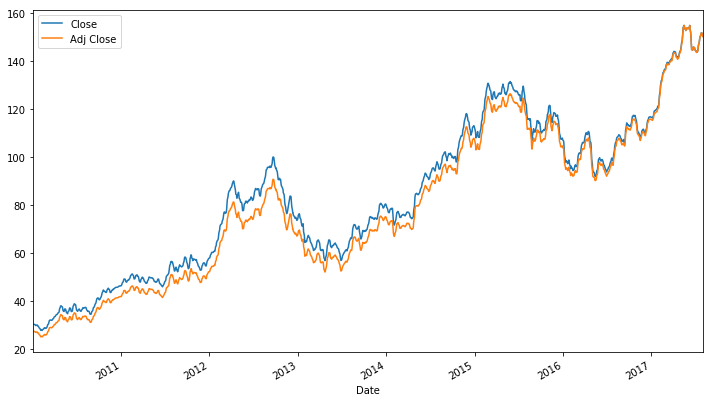

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

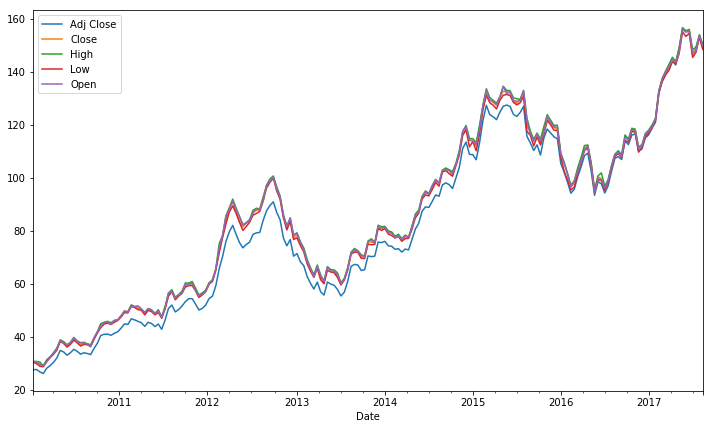

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

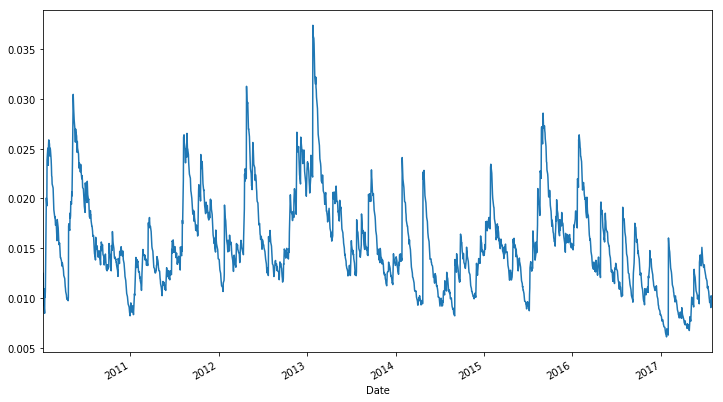

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

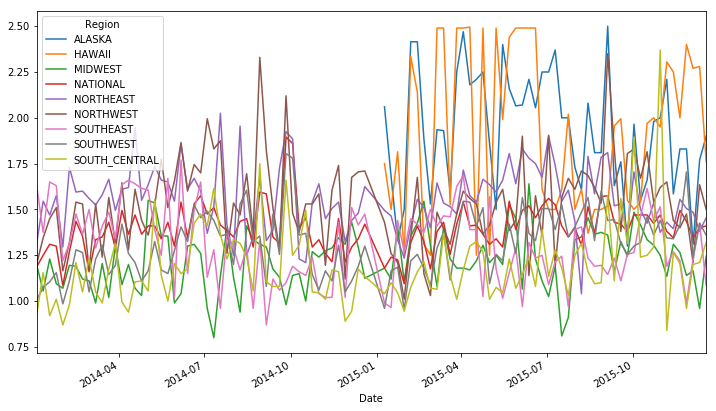

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

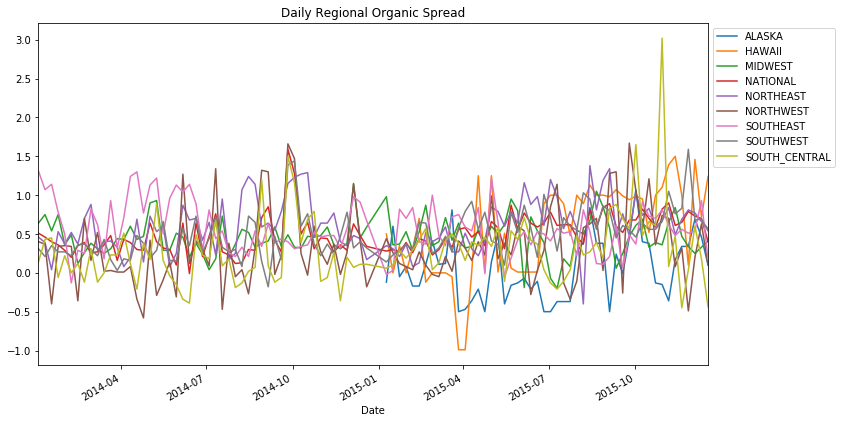

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


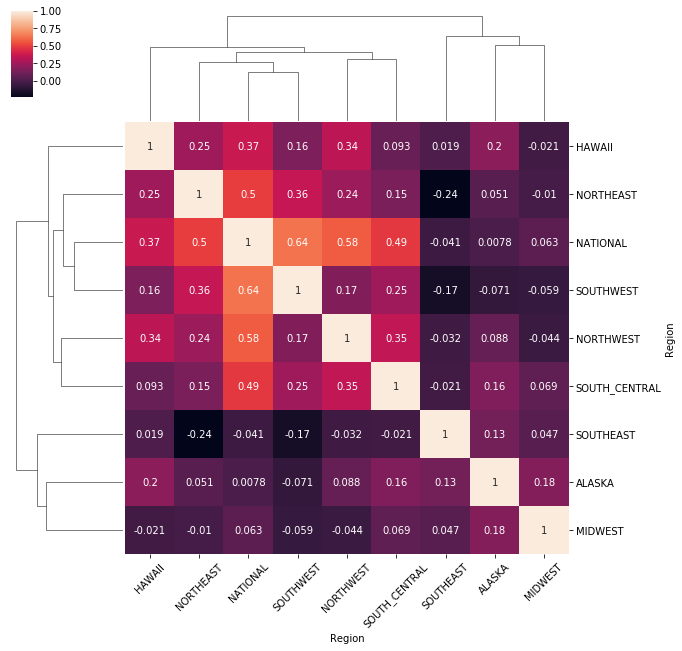

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

MUNDO REAAAAAL

In [65]:
from urllib.parse import urlencode
import pandas as pd
import requests

resp = requests.get("https://www.datos.gov.co/resource/mg23-frzx.json")

data = resp.json()

tabla = pd.DataFrame(data)
tabla['fechainscripcionbeneficiario'] = pd.to_datetime(tabla['fechainscripcionbeneficiario'], errors='coerce')
tabla['cantidaddebeneficiarios'] = pd.to_numeric(tabla['cantidaddebeneficiarios'], errors='coerce').astype('float64')
tabla['estadobeneficiario'] = tabla['estadobeneficiario'].apply(lambda x: True if x == 'ACTIVO' else False)
display(tabla)

tabla.head

,bancarizado,codigodepartamentoatencion,codigomunicipioatencion,discapacidad,estadobeneficiario,etnia,fechainscripcionbeneficiario,genero,nivelescolaridad,nombredepartamentoatencion,...,tipoasignacionbeneficio,tipobeneficio,tipodocumento,tipopoblacion,rangobeneficioconsolidadoasignado,rangoultimobeneficioasignado,fechaultimobeneficioasignado,rangoedad,titular,cantidaddebeneficiarios
0,NO,95,95001,NO,True,ND,2014-05-01,Hombre,ND,GUAVIARE,...,ND,NUTRICIÓN MENOR,RC,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,5.0
1,NO,63,63001,NO,True,ND,2015-04-01,Mujer,PRIMARIA,QUINDIO,...,ND,TRANSICIÓN,RC,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,1.0
2,SI,23,23686,NO,True,ND,2013-01-01,Mujer,ND,CORDOBA,...,MONETARIO,ND,CC,DESPLAZADOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,50-65,SI,1.0
3,ND,17,17541,NO,True,ND,2012-11-01,Hombre,ND,CALDAS,...,ND,EDUCACIÓN PRIMARIA,RC,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,1.0
4,NO,73,73067,NO,True,ND,2018-05-01,Mujer,ND,TOLIMA,...,ND,ND,CC,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,2018-01-01,18-29,SI,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ND,81,81794,NO,True,ND,2017-04-01,Mujer,ND,ARAUCA,...,MONETARIO,EDUCACIÓN SECUNDARIANUTRICIÓN,TI,DESPLAZADOS,1.500.001 - 3.000.000,0 - 1.300.000,2018-01-01,18-29,SI,1.0
996,NO,05,05001,NO,True,ND,2013-01-01,Hombre,TRANSICION,ANTIOQUIA,...,ND,TRANSICIÓNNUTRICIÓN MENOR,RC,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,7.0
997,NO,13,13654,NO,True,RAIZAL,2012-11-01,Hombre,SECUNDARIA,BOLIVAR,...,ND,EDUCACIÓN SECUNDARIA,CC,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,18-29,NO,1.0
998,NO,76,76834,NO,True,ND,2012-10-01,Hombre,ND,VALLE,...,MONETARIO,ND,CC,DESPLAZADOS,> 6.000.001,0 - 1.300.000,2018-01-01,30-49,SI,1.0


<bound method NDFrame.head of     bancarizado codigodepartamentoatencion codigomunicipioatencion  \
0            NO                         95                   95001   
1            NO                         63                   63001   
2            SI                         23                   23686   
3            ND                         17                   17541   
4            NO                         73                   73067   
..          ...                        ...                     ...   
995          ND                         81                   81794   
996          NO                         05                   05001   
997          NO                         13                   13654   
998          NO                         76                   76834   
999          NO                         25                   25658   

    discapacidad  estadobeneficiario   etnia fechainscripcionbeneficiario  \
0             NO                True      ND                   2014-05-01   
1             NO                True      ND                   2015-04-01   
2             NO                True      ND                   2013-01-01   
3             NO                True      ND                   2012-11-01   
4             NO                True      ND                   2018-05-01   
..           ...                 ...     ...                          ...   
995           NO                True      ND                   2017-04-01   
996           NO                True      ND                   2013-01-01   
997           NO                True  RAIZAL                   2012-11-01   
998           NO                True      ND                   2012-10-01   
999           NO                True      ND                   2013-05-01   

     genero nivelescolaridad nombredepartamentoatencion  ...  \
0    Hombre               ND                   GUAVIARE  ...   
1     Mujer         PRIMARIA                    QUINDIO  ...   
2     Mujer               ND                    CORDOBA  ...   
3    Hombre               ND                     CALDAS  ...   
4     Mujer               ND                     TOLIMA  ...   
..      ...              ...                        ...  ...   
995   Mujer               ND                     ARAUCA  ...   
996  Hombre       TRANSICION                  ANTIOQUIA  ...   
997  Hombre       SECUNDARIA                    BOLIVAR  ...   
998  Hombre               ND                      VALLE  ...   
999  Hombre       SECUNDARIA               CUNDINAMARCA  ...   

    tipoasignacionbeneficio                  tipobeneficio tipodocumento  \
0                        ND                NUTRICIÓN MENOR            RC   
1                        ND                     TRANSICIÓN            RC   
2                 MONETARIO                             ND            CC   
3                        ND             EDUCACIÓN PRIMARIA            RC   
4                        ND                             ND            CC   
..                      ...                            ...           ...   
995               MONETARIO  EDUCACIÓN SECUNDARIANUTRICIÓN            TI   
996                      ND      TRANSICIÓNNUTRICIÓN MENOR            RC   
997                      ND           EDUCACIÓN SECUNDARIA            CC   
998               MONETARIO                             ND            CC   
999                      ND           EDUCACIÓN SECUNDARIA            TI   

    tipopoblacion rangobeneficioconsolidadoasignado  \
0     DESPLAZADOS                     0 - 1.500.000   
1     DESPLAZADOS                     0 - 1.500.000   
2     DESPLAZADOS             4.500.001 - 6.000.000   
3     DESPLAZADOS                     0 - 1.500.000   
4     DESPLAZADOS                     0 - 1.500.000   
..            ...                               ...   
995   DESPLAZADOS             1.500.001 - 3.000.000   
996   DESPLAZADOS                     0 - 1.500.000   
997   DESPLAZADOS          

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
tabla['fechainscripcionbeneficiario'] = pd.to_datetime(tabla['fechainscripcionbeneficiario'], errors='coerce')
tabla['cantidaddebeneficiarios'] = pd.to_numeric(tabla['cantidaddebeneficiarios'], errors='coerce').astype('float64')



tabla.dtypes


,0
bancarizado,object
codigodepartamentoatencion,object
codigomunicipioatencion,object
discapacidad,object
estadobeneficiario,bool
etnia,object
fechainscripcionbeneficiario,datetime64[ns]
genero,object
nivelescolaridad,object
nombredepartamentoatencion,object


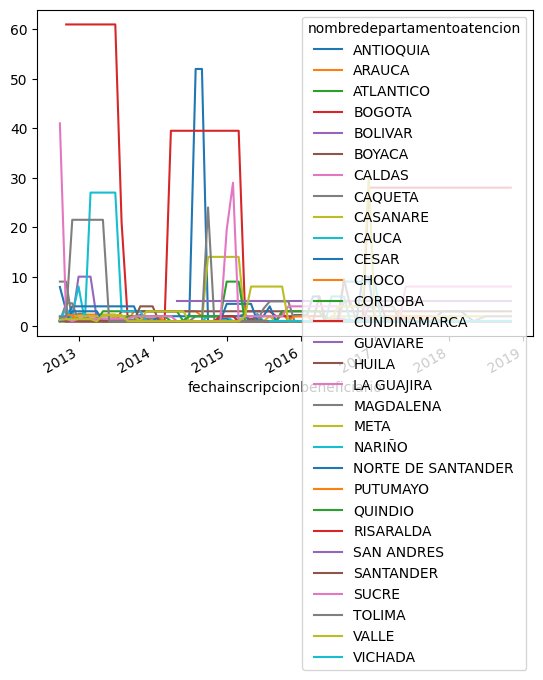

In [78]:
poblacionDesplazada = tabla[tabla.tipopoblacion == "DESPLAZADOS"]
poblacionDesplazada.groupby(['fechainscripcionbeneficiario', 'nombredepartamentoatencion'])['cantidaddebeneficiarios'].mean().unstack().ffill().plot();

In [76]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('estadobeneficiario').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def beneficiarios_by_region(df):
    """
    Cual es la diferencia entre la cantidad de beneficiarios dentro de cada departamento?
    """
    # Aggregate 'cantidaddebeneficiarios' before unstacking
    df = df.groupby(['fechainscripcionbeneficiario', 'nombredepartamentoatencion', 'estadobeneficiario'])['cantidaddebeneficiarios'].sum().reset_index()

    return (
        df
        .set_index(['fechainscripcionbeneficiario', 'nombredepartamentoatencion', 'estadobeneficiario'])
        ['cantidaddebeneficiarios']
        .unstack(level=['nombredepartamentoatencion', 'estadobeneficiario'])
        .ffill()
        .groupby(level='nombredepartamentoatencion', axis=1)
        .apply(_organic_spread)
    )

<ipython-input-76-c4b341330363>:20: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


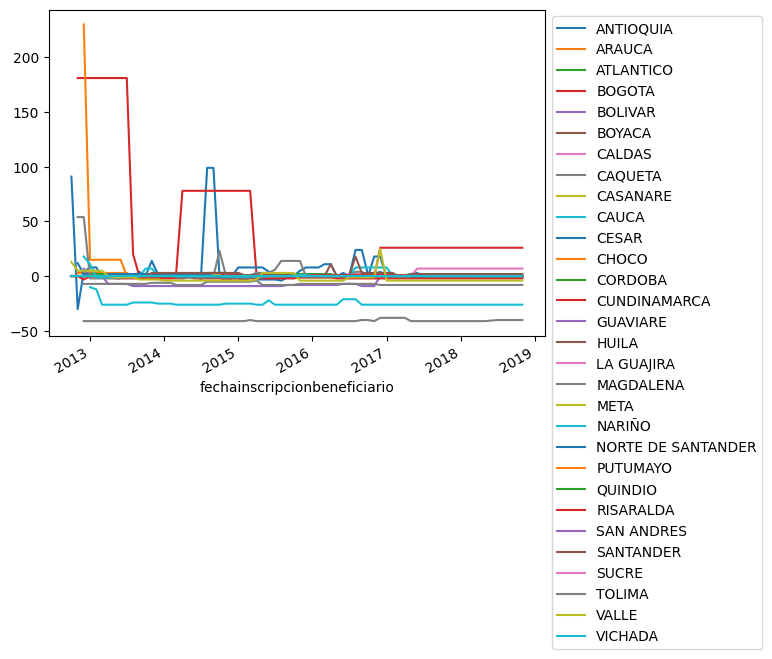

In [79]:
beneficiarios_by_region(poblacionDesplazada).plot();
plt.legend(bbox_to_anchor=(1, 1));

In [92]:
beneficiarios = beneficiarios_by_region(poblacionDesplazada).corr()
beneficiarios_clean = beneficiarios.fillna(0)
beneficiarios_clean

<ipython-input-76-c4b341330363>:20: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


nombredepartamentoatencion,ANTIOQUIA,ARAUCA,ATLANTICO,BOGOTA,BOLIVAR,BOYACA,CALDAS,CAQUETA,CASANARE,CAUCA,...,NORTE DE SANTANDER,PUTUMAYO,QUINDIO,RISARALDA,SAN ANDRES,SANTANDER,SUCRE,TOLIMA,VALLE,VICHADA
nombredepartamentoatencion,,,,,,,,,,,,,,,,,,,,,
ANTIOQUIA,1.000000,-0.095108,0.592039,-0.020631,-0.126868,0.0,0.057228,0.324601,0.0,0.017622,...,-0.114446,0.0,0.0,-0.051370,0.0,0.216504,0.0,-0.065220,0.097930,0.0
ARAUCA,-0.095108,1.000000,0.197621,0.820314,0.114497,0.0,-0.021962,0.005473,0.0,0.352874,...,0.102298,0.0,0.0,-0.330405,0.0,-0.155525,0.0,-0.242236,0.337565,0.0
ATLANTICO,0.592039,0.197621,1.000000,0.606210,-0.292200,0.0,-0.136914,0.490077,0.0,-0.078804,...,-0.050929,0.0,0.0,0.092199,0.0,0.093572,0.0,-0.173904,-0.138923,0.0
BOGOTA,-0.020631,0.820314,0.606210,1.000000,0.230750,0.0,-0.310288,0.174871,0.0,0.310354,...,0.223131,0.0,0.0,-0.080835,0.0,-0.125077,0.0,-0.129695,0.245710,0.0
BOLIVAR,-0.126868,0.114497,-0.292200,0.230750,1.000000,0.0,-0.099112,-0.464003,0.0,0.142741,...,-0.391724,0.0,0.0,-0.042162,0.0,-0.018673,0.0,0.438456,0.193740,0.0
BOYACA,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
CALDAS,0.057228,-0.021962,-0.136914,-0.310288,-0.099112,0.0,1.000000,0.057566,0.0,0.398819,...,-0.145737,0.0,0.0,0.274486,0.0,0.418012,0.0,0.144868,0.253127,0.0
CAQUETA,0.324601,0.005473,0.490077,0.174871,-0.464003,0.0,0.057566,1.000000,0.0,0.079872,...,0.456183,0.0,0.0,0.225343,0.0,0.068146,0.0,-0.276716,-0.191192,0.0
CASANARE,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


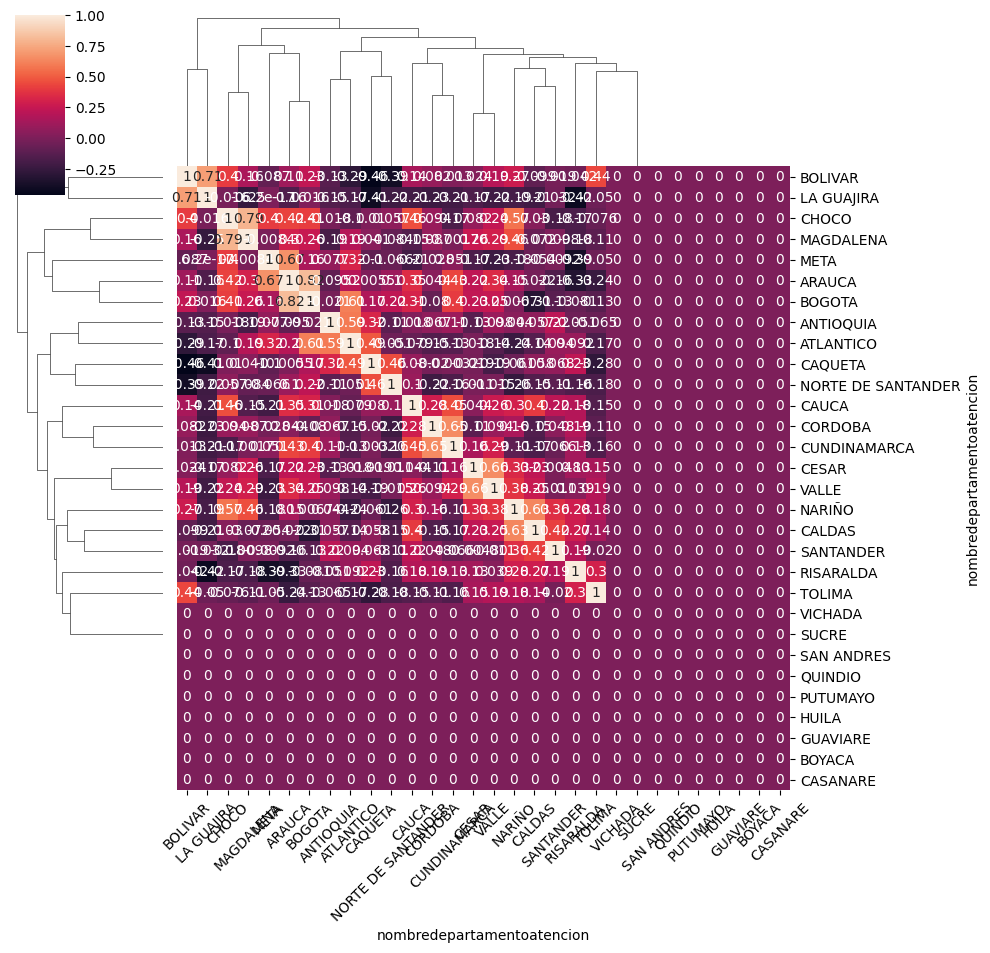

In [94]:
import seaborn as sns
grid = sns.clustermap(beneficiarios_clean, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Thanks!